<a href="https://colab.research.google.com/github/MeiHuaYang123/sbu-minnesota-healthinsurance-allpayer/blob/main/scripts/analytics/Exploratory_MN_apcd_diagnoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
## Configure pandas to display non-exponential numbers
pd.set_option('display.float_format', '{:.2f}'.format)


In [4]:
# Load the dataset (modify the filename if needed)
file_path = 'https://raw.githubusercontent.com/hantswilliams/sbu-minnesota-healthinsurance-allpayer/refs/heads/main/data/processed/rxdetail2020.csv'
df = pd.read_csv(file_path)

<ipython-input-6-d1ea7acb8050>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_diagnoses.index, y=top_10_diagnoses.values, palette="viridis")


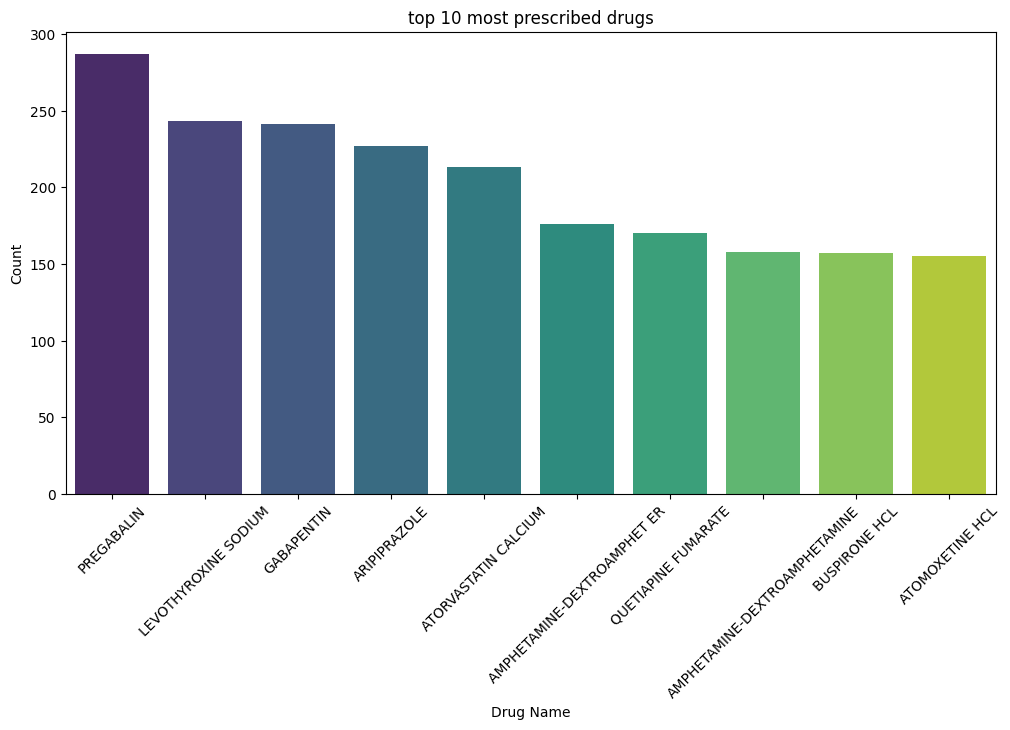

In [6]:
### 1. Understanding Diagnosis Code Distribution ###
# Get the top 10 most common principal diagnosis codes
top_10_diagnoses = df['propname'].value_counts().nlargest(10)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_diagnoses.index, y=top_10_diagnoses.values, palette="viridis")
plt.xlabel("Drug Name")
plt.ylabel("Count")
plt.title("top 10 most prescribed drugs")
plt.xticks(rotation=45)
plt.show()

Top 10 Diagnoses with Highest Mean Total Paid Amount:
propname
HUMIRA PEN         47551921.84
NOVOLOG FLEXPEN    31117365.44
VICTOZA            30677447.01
ENBREL SURECLICK   28483519.20
ELIQUIS            24032759.97
Name: total_cost, dtype: float64


<ipython-input-8-b6f05498e100>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="propname", y="total_cost", data=df_top_10, palette="coolwarm")


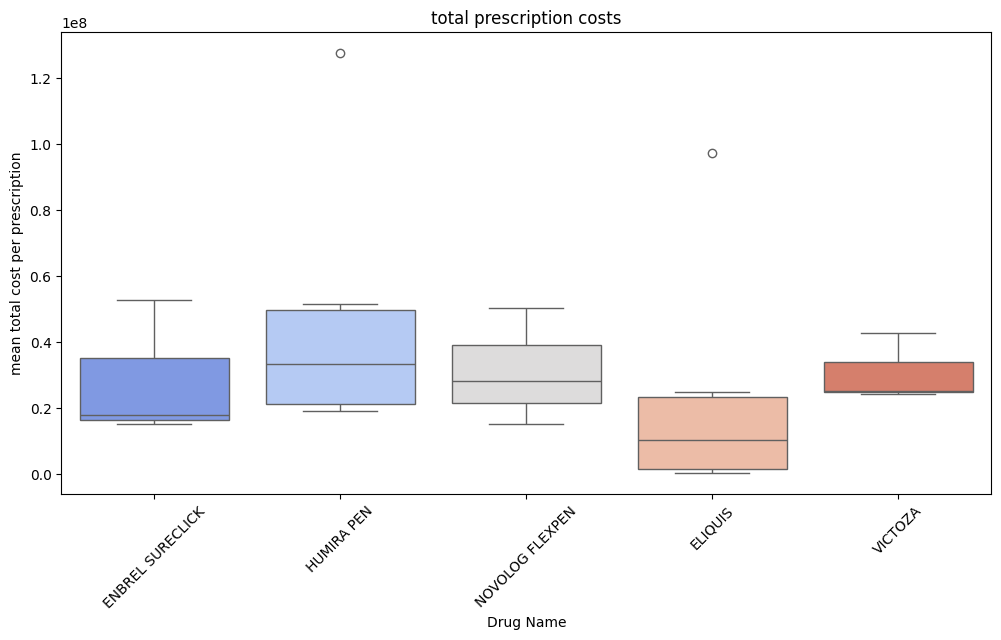

In [8]:
### 2. Diagnosis vs. Total Paid Amount ###
# Group by diagnosis code and calculate the mean total paid amount
diagnosis_paid_mean = df.groupby('propname')['total_cost'].mean().nlargest(5)
print("Top 10 Diagnoses with Highest Mean Total Paid Amount:")
print(diagnosis_paid_mean)

# Boxplot for top 5 diagnoses
top_10_diagnoses = diagnosis_paid_mean.index
df_top_10 = df[df['propname'].isin(top_10_diagnoses)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="propname", y="total_cost", data=df_top_10, palette="coolwarm")
plt.xlabel("Drug Name")
plt.ylabel("mean total cost per prescription")
plt.title("total prescription costs")
plt.xticks(rotation=45)
plt.show()

In [13]:
### 3. Diagnoses by Age Group ###
# Create a contingency table
contingency_table = pd.crosstab(df['ther_class'], df['total_cost'])

# Identify top 3 diagnoses for each age group
top_3_by_age = df.groupby('ther_class')['total_cost'].value_counts().groupby(level=0).head(3)
print("Top 3 therapeutic classes:")
print(top_3_by_age)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square Test Result: χ²={chi2:.2f}, p-value={p:.4f}")
if p < 0.05:
    print("Significant difference in diagnosis distribution by therapeutic class.")
else:
    print("No significant difference in diagnosis distribution by therapeutic class.")

Top 3 therapeutic classes:
ther_class                        total_cost
Analgesics and Anesthetics        8.78          1
                                  12.41         1
                                  12.70         1
Anti-Infective Agents             28.80         1
                                  36.72         1
                                  59.67         1
Antineoplastic Agents             353.36        1
                                  388.51        1
                                  608.44        1
Biologicals                       345.45        1
                                  549.63        1
                                  574.47        1
Cardiovascular Agents             682.56        2
                                  1998.70       2
                                  2240.26       2
Central Nervous System Drugs      869.24        2
                                  35.69         1
                                  57.25         1
Endocrine and Metabolic Drug

Mean Payment Differences by Drugs:
                                insurer_paid_mean  member_paid_mean
propname                                                           
10 SERIES BP MONITOR/UPPER ARM              48.28              0.20
12 HOUR DECONGESTANT                        11.99              1.09
12 HOUR NASAL DECONGESTANT                   1.68              0.81
24HR ALLERGY RELIEF                          6.82              2.50
3 DAY VAGINAL                                8.52              1.19
...                                           ...               ...
ZUMANDIMINE                                 45.50              1.62
ZYLET                                      224.25             82.19
ZYPREXA                                   1460.72             21.55
ZYRTEC-D ALLERGY & CONGESTION               22.60             14.20
ZYTIGA                                    9522.91            385.23

[3395 rows x 2 columns]

Mean Payment Differences with Delta:
                  

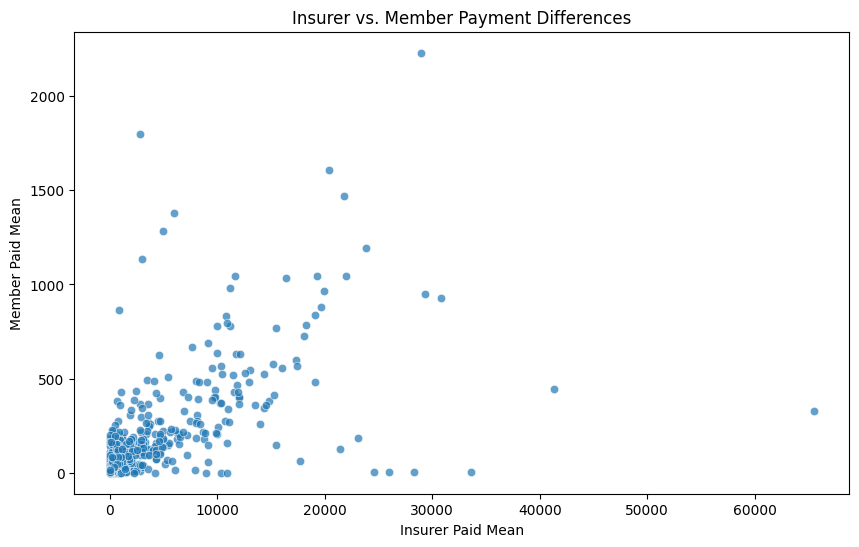

In [15]:
### 4. Insurer vs. Member Payment Differences ###
# Group by diagnosis code and calculate means
payment_means = df.groupby('propname')[['insurer_paid_mean', 'member_paid_mean']].mean()
print("Mean Payment Differences by Drugs:")
print(payment_means)

# Create a delta between insurer_paid_amt_mean and member_paid_amt_mean
payment_means['delta'] = payment_means['insurer_paid_mean'] - payment_means['member_paid_mean']
print("\nMean Payment Differences with Delta:")
print(payment_means)

# Top diagnoses with highest member out-of-pocket costs
top_member_paid = payment_means['member_paid_mean'].nlargest(5)
print("\nTop 5 Diagnoses with Highest Member Out-of-Pocket Costs:")
print(top_member_paid)

# Top diagnoses with highest delta between insurer and member
top_delta = payment_means['delta'].nlargest(5)
print("\nTop 5 Diagnoses with Highest Delta Between Insurer and Member:")
print(top_delta)

# Scatter plot: Insurer Paid vs. Member Paid
plt.figure(figsize=(10, 6))
sns.scatterplot(x='insurer_paid_mean', y='member_paid_mean', data=payment_means, alpha=0.7)
plt.xlabel("Insurer Paid Mean")
plt.ylabel("Member Paid Mean")
plt.title("Insurer vs. Member Payment Differences")
plt.show()